In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

In [2]:
xs=np.array([1,2,3,4,5,6,7],dtype=np.float64)
ys=np.array([34,64,83,53,90,106,150],dtype=np.float64)

In [3]:
#m is best fit slope and c is the y-intercept
def m_and_c(xs,ys):
    m=((mean(xs)*mean(ys)-mean(xs*ys))
       /(mean(xs)**2-mean(xs*xs)))
    c=mean(ys)-m*mean(xs)
    return m,c

In [4]:
xs*ys

array([  34.,  128.,  249.,  212.,  450.,  636., 1050.])

In [5]:
m,c=m_and_c(xs,ys)
print(m,c)

15.67857142857143 20.14285714285714


In [6]:
#regression_line=[(m*x+c) for x in xs]
regression_line=[]
for x in xs:
    regression_line.append(m*x+c)
regression_line

[35.82142857142857,
 51.5,
 67.17857142857143,
 82.85714285714286,
 98.53571428571429,
 114.21428571428572,
 129.89285714285717]

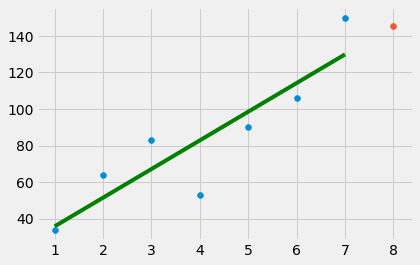

In [7]:

x1=8
y1=m*x1+c
plt.scatter(xs,ys)
plt.scatter(x1,y1)
plt.plot(xs,regression_line, color='g')
plt.show()

In [8]:
#goodness of fit
#r=1-SE(REG)/SE(YS)
def squared_error(ys,ys_reg):
    return sum((ys_reg-ys)**2)


def coeff_of_determination(ys,ys_reg):
    y_mean_line=[mean(ys) for y in ys]
    SE_reg=squared_error(ys,ys_reg)
    SE_y_mean=squared_error(ys,y_mean_line)
    return (1-SE_reg/SE_y_mean)

In [9]:
ys_reg=regression_line
r_squared=coeff_of_determination(ys,ys_reg)
r_squared

0.788521652319073

In [10]:
#creating (psudo)random data set for testing
def create_dataset(n,variance,step=2,correlation=False):
    val=1
    ys=[]
    for i in range(n):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation=='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
    xs= [i for i in range(len(ys))]        
    return np.array(xs, dtype=np.float64),np.array(ys, dtype=np.float64)

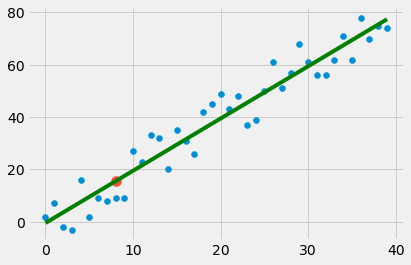

(None, 0.9318110418358279)

In [16]:
#for less variance we get more coeff of determination
xs1,ys1=create_dataset(40,10,correlation='pos') 

m1,c1=m_and_c(xs1,ys1)
regression_line1=[(m1*x+c1) for x in xs1]
x1=8
y1=m1*x1+c1
plt.scatter(xs1,ys1)
plt.plot(xs1,regression_line1, color='g')
plt.scatter(x1,y1, s=100)
plt.show(), coeff_of_determination(ys1,regression_line1)

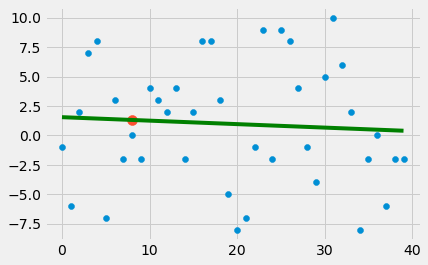

(None, 0.00442834575077633)

In [17]:
xs1,ys1=create_dataset(40,10) 

m1,c1=m_and_c(xs1,ys1)
regression_line1=[(m1*x+c1) for x in xs1]
x1=8
y1=m1*x1+c1
plt.scatter(xs1,ys1)
plt.plot(xs1,regression_line1, color='g')
plt.scatter(x1,y1, s=100)
plt.show(), coeff_of_determination(ys1,regression_line1)